In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import rc
from matplotlib.image import NonUniformImage

import os,sys

import astropy.units as u
from astropy.cosmology import z_at_value
from astropy.cosmology import WMAP9 as cosmo

import gwent

In [2]:
rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Times New Roman'],'size':14})#,'weight':'bold'})

# Load Directory

In [3]:
load_directory = gwent.__path__[0] + '/LoadFiles/InstrumentFiles/'

# Load Data Files

#### ESA LISA 

In [4]:
lisa_filedirectory = load_directory + 'LISA_ESA/SNRFiles/'

In [5]:
lisa_SNR_filename = 'LISA_ESA_SNR_Matrix.dat'
lisa_Samples_filename = 'LISA_ESA_Samples.dat'
lisa_SNR_filelocation = lisa_filedirectory+lisa_SNR_filename
lisa_Samples_filelocation = lisa_filedirectory+lisa_Samples_filename

#load SNR from file
lisa_SNR = np.loadtxt(lisa_SNR_filelocation)

#z and M sample space corresponding to SNR height
#First column is x-axis variable, second is y-axis variable
lisa_Samples = np.loadtxt(lisa_Samples_filelocation)

#Take log of variables and SNR for plotting
lisa_logSamples = np.log10(lisa_Samples)
lisa_logSNR = np.log10(lisa_SNR)

#### Einstein Telescope

In [6]:
et_filedirectory = load_directory + 'EinsteinTelescope/SNRFiles/'

In [7]:
et_SNR_filename = 'ET_SNR_Matrix.dat'
et_Samples_filename = 'ET_Samples.dat'
et_SNR_filelocation = et_filedirectory+et_SNR_filename
et_Samples_filelocation = et_filedirectory+et_Samples_filename
et_SNR = np.loadtxt(et_SNR_filelocation)
et_Samples = np.loadtxt(et_Samples_filelocation)
et_logSamples = np.log10(et_Samples)
et_logSNR = np.log10(et_SNR)

#### aLIGO

In [8]:
aLIGO_filedirectory = load_directory + 'aLIGO/SNRFiles/'

In [9]:
aLIGO_SNR_filename = 'aLIGO_SNR_Matrix.dat'
aLIGO_Samples_filename = 'aLIGO_Samples.dat'
aLIGO_SNR_filelocation = aLIGO_filedirectory+aLIGO_SNR_filename
aLIGO_Samples_filelocation = aLIGO_filedirectory+aLIGO_Samples_filename
aLIGO_SNR = np.loadtxt(aLIGO_SNR_filelocation)
aLIGO_Samples = np.loadtxt(aLIGO_Samples_filelocation)
aLIGO_logSNR = np.log10(aLIGO_SNR)
aLIGO_logSamples = np.log10(aLIGO_Samples)

#### NANOGrav

In [10]:
nanograv_filedirectory = load_directory + 'NANOGrav/SNRFiles/'

In [11]:
nanograv_SNR_filename = 'NANOGrav_SNR_Matrix.dat'
nanograv_Samples_filename = 'NANOGrav_Samples.dat'
nanograv_SNR_filelocation = nanograv_filedirectory+nanograv_SNR_filename
nanograv_Samples_filelocation = nanograv_filedirectory+nanograv_Samples_filename
nanograv_SNR = np.loadtxt(nanograv_SNR_filelocation)
nanograv_Samples = np.loadtxt(nanograv_Samples_filelocation)
nanograv_logSamples = np.log10(nanograv_Samples)
nanograv_logSNR = np.log10(nanograv_SNR)

#### SKA

In [12]:
SKA_filedirectory = load_directory + 'SKA/SNRFiles/'

In [13]:
SKA_SNR_filename = 'SKA_SNR_Matrix.dat'
SKA_Samples_filename = 'SKA_Samples.dat'
SKA_SNR_filelocation = SKA_filedirectory+SKA_SNR_filename
SKA_Samples_filelocation = SKA_filedirectory+SKA_Samples_filename
SKA_SNR = np.loadtxt(SKA_SNR_filelocation)
SKA_Samples = np.loadtxt(SKA_Samples_filelocation)
SKA_logSamples = np.log10(SKA_Samples)
SKA_logSNR = np.log10(SKA_SNR)

# Make Waterfall Plots

In [14]:
#Selects contour levels to separate sections into
contLevels = np.array([5, 10, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7])
logLevels = np.log10(contLevels)

contourcolorPresent = 'plasma'
transparencyPresent = 1.0
contourcolorFuture = 'plasma'
transparencyFuture = 0.6
axissize = 12
labelsize = 16
textsize = 14
textcolor1 = 'k'
textcolor2 = 'w'
linesize = 4
figsize=(10,6)

In [15]:
###########################
#Set pretty labels
Mlabel_min = 0
Mlabel_max = 11
zlabel_min = -2.0
zlabel_max = 3.0
zlabels = np.logspace(zlabel_min,zlabel_max,zlabel_max-zlabel_min+1)
Mlabels = np.logspace(Mlabel_min,Mlabel_max,Mlabel_max-Mlabel_min+1)

ages1 = np.array([13.5,13,10,5,1])*u.Gyr 
ages2 = np.array([500,100,10,1])*u.Myr
ages2 = ages2.to('Gyr')
ages = np.hstack((ages1.value,ages2.value))
ages = ages*u.Gyr
ageticks = [z_at_value(cosmo.age,age) for age in ages]

In [16]:
#########################
#Label positions for different GW detectors
#########################
#Label different GW detectors
labelaLIGO_text = 'aLIGO\n(2016)'
labelaLIGO_xpos = 0.22
labelaLIGO_ypos = 0.125

labelnanograv_text = 'NANOGrav\n(2018)'
labelnanograv_xpos = 0.91
labelnanograv_ypos = 0.175

labelet_text = 'ET\n(~2030s)'
labelet_xpos = 0.175
labelet_ypos = 0.6
#labelet_xpos = 0.1
#labelet_ypos = 0.75

labelLisa_text = 'LISA\n(~2030s)'
labelLisa_xpos = 0.6
labelLisa_ypos = 0.1

labelIpta_text = 'IPTA\n(~2030s)'
labelIpta_xpos = 0.65
labelIpta_ypos = 0.85
#labelIpta_xpos = 0.775
#labelIpta_ypos = 0.75

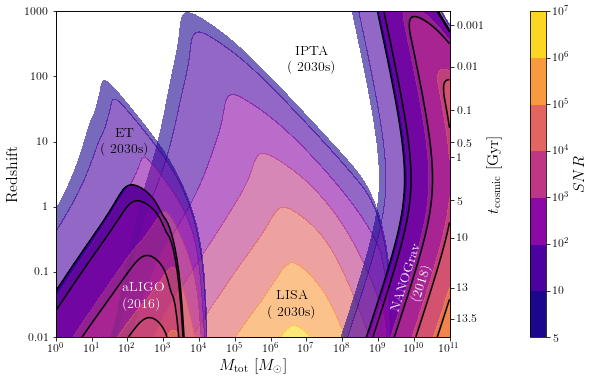

In [17]:
fig, ax1 = plt.subplots(figsize=figsize)
###########################
#Set other side y-axis for lookback time scalings
ax2 = ax1.twinx()

CS1 = ax1.contourf(nanograv_logSamples[0],nanograv_logSamples[1],nanograv_logSNR,logLevels,\
                   cmap = contourcolorPresent, alpha = transparencyPresent)

ax2.contour(nanograv_logSamples[0],nanograv_logSamples[1],nanograv_logSNR,logLevels,colors = 'k')

ax1.contourf(aLIGO_logSamples[0],aLIGO_logSamples[1],aLIGO_logSNR,logLevels,\
             cmap = contourcolorPresent, alpha = transparencyPresent)

ax1.contour(aLIGO_logSamples[0],aLIGO_logSamples[1],aLIGO_logSNR,logLevels,colors = 'k')

ax1.contourf(lisa_logSamples[0],lisa_logSamples[1],lisa_logSNR,logLevels,\
             cmap=contourcolorFuture, alpha = transparencyFuture)

ax1.contourf(et_logSamples[0],et_logSamples[1],et_logSNR,logLevels,\
             cmap = contourcolorFuture, alpha = transparencyFuture)

ax1.contourf(SKA_logSamples[0],SKA_logSamples[1],SKA_logSNR,logLevels,\
             cmap = contourcolorFuture, alpha = transparencyFuture)

#########################
#Set axes limits 
ax1.set_xlim(et_logSamples[0][0],11)
ax1.set_ylim(SKA_logSamples[1][0],SKA_logSamples[1][-1])

#########################
#Set ticks and labels
ax1.set_yticks(np.log10(zlabels))
ax1.set_xticks(np.log10(Mlabels))
ax1.set_xticklabels([r'$10^{%i}$' %x for x in np.log10(Mlabels)],\
    fontsize = axissize)
ax1.set_yticklabels([x if int(x) < 1 else int(x) for x in zlabels],\
    fontsize = axissize)

ax1.set_xlabel(r'$M_{\rm tot}$ $[M_{\odot}]$',fontsize = labelsize)
ax1.set_ylabel(r'${\rm Redshift}$',fontsize = labelsize)
#ax1.yaxis.set_label_coords(-.5,.5)

ax2.set_yticks(np.log10(ageticks))
#ax2.set_yticklabels(['%f' %age for age in ageticks],fontsize = axissize)
ax2.set_yticklabels(['{:g}'.format(age) for age in ages.value],fontsize = axissize)
ax2.set_ylabel(r'$t_{\rm cosmic}$ [Gyr]',fontsize=labelsize)


#########################
#Label different GW detectors
plt.text(labelaLIGO_xpos,labelaLIGO_ypos,labelaLIGO_text,fontsize = textsize, \
         horizontalalignment='center',verticalalignment='center', color = textcolor2,transform = ax1.transAxes)

plt.text(labelnanograv_xpos,labelnanograv_ypos,labelnanograv_text,fontsize = textsize,\
         horizontalalignment='center',verticalalignment='center', color = textcolor2,transform = ax1.transAxes,\
        rotation=72)

plt.text(labelet_xpos,labelet_ypos,labelet_text,fontsize = textsize,\
         horizontalalignment='center',verticalalignment='center', color = textcolor1,transform = ax1.transAxes)

plt.text(labelLisa_xpos,labelLisa_ypos,labelLisa_text,fontsize = textsize,\
         horizontalalignment='center',verticalalignment='center', color = textcolor1,transform = ax1.transAxes)

plt.text(labelIpta_xpos,labelIpta_ypos,labelIpta_text,fontsize = textsize,\
         horizontalalignment='center',verticalalignment='center', color = textcolor1,transform = ax1.transAxes)

#########################
#Make colorbar
cbar = fig.colorbar(CS1,ax=(ax1,ax2),pad=0.01)
#cbar = fig.colorbar(CS1)
cbar.set_label(r'$SNR$',fontsize = labelsize)
cbar.ax.tick_params(labelsize = axissize)
cbar.ax.set_yticklabels([r'$10^{%i}$' %x if int(x) > 1 else r'$%i$' %(10**x) for x in logLevels])
plt.show()